In [1]:
%matplotlib inline
import os, sys, gc
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from IPython.display import display, HTML
import matplotlib

## Power analysis
We are concerned with calculating the appropriate sample size needed to replicate the effect found in Experiment 3 of "Relational similarity and the nonindependence of features in similarity judgments", Goldstone, Medin, Gentner (1991). 

They report the following statistic:
"The mean similarity ratings, collapsing over the six picture groups, show the same trends, yielding a value of .6 for (D - B) - (C - A); this value is significantly greater than zero (df = 5, t = 3.448, p < .02)"

From these values, we can see that they used a two-sided t-test.

Recall that the t-statistic is given by the following distribution:

$$
T_n = \frac{\hat{\mu} - \mu_0}{\hat{\sigma} \cdot n^{-\frac{1}{2}}},
$$

where $\hat{\mu} = \frac{1}{N}\sum_{i=1}^N x_i$ and $\hat{\sigma} = \sqrt{\frac{1}{N}\sum_{i=1}^N(x_i - \hat{\mu})^2}$.

The test statistic under the null hypothesis follows a t-distribution with $N-1$ degrees of freedom, with the assumption that data are i.i.d. $N({\mu}_1, \sigma_1^2)$.

Collapsing across the $N=6$ stimulus sets, we have a significant result at significance level $\alpha=0.05$ for $T_N>2.571$ (two-tailed). 

Also recall that power is the probability that the test correctly rejects the null hypothesis when a specific alternative hypothesis is true. 

From the following quantities, we can calculate the sample size needed to test a replication of this effect:
<ol>
    <li>Estimates of the effect size from the last study, </li>
    <li>Estimates of the effect size from the last study, </li>
    <li>Estimates of the effect size from the last study, </li>
    <li>Estimates of the effect size from the last study, </li>
</ol>
power of $1-\beta = 0.8$, a significance of $\alpha=0.05$, the sample size (six stimulus sets) and estimates of the effect size from the last study,

In [2]:
originalData = np.array([0.8, 1.1, 0.7, 0.5, -0.1, 0.7])
originalMean = np.mean(originalData)
originalSD = np.std(originalData)

In [4]:
# N.B. all hacky and done quickly
version = '1.0'
load_dir = '../data/human/1.0'
save_dir = load_dir
print(os.listdir(load_dir))
ignore = set(['w86a7f6a', 'we8453df', 'w85a4c6c', 'w93c8b0c', 'wb4d0e59', 'w8fe1e0c', 'w8488b17', 'w2bc1e74'])

dataDF = pd.read_pickle('{}/processed_data.p'.format(save_dir))

['.DS_Store', 'processed_data.p', 'participants.csv', 'html-button-response-filtered.csv', 'html-button-response.csv', 'survey-multi-select.csv', 'processed_data_summary.p', 'html-keyboard-response.csv']


A               5.428571
B               1.607143
C               4.589286
D               2.160714
(D-B)-(C-A)     1.392857
N_max           1.000000
N_min           0.000000
N              28.000000
dtype: float64
A              1.303232
B              1.429563
C              1.650216
D              2.353302
(D-B)-(C-A)    1.701618
dtype: float64


(array([ 2.,  0.,  1.,  1.,  4., 10.,  3.,  4.,  1.,  2.]),
 array([-2.58157708, -2.14082002, -1.70006296, -1.25930589, -0.81854883,
        -0.37779177,  0.06296529,  0.50372236,  0.94447942,  1.38523648,
         1.82599355]),
 <BarContainer object of 10 artists>)

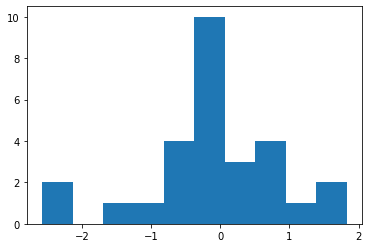

In [6]:
expResults = dataDF[['A', 'B', 'C', 'D', '(D-B)-(C-A)']].mean()
expResults["N_max"] = dataDF["Max"].sum()
expResults["N_min"] = dataDF["Min"].sum()
expResults["N"] = len(dataDF)
print(expResults)
sdResults = dataDF[['A', 'B', 'C', 'D', '(D-B)-(C-A)']].std()
print(sdResults)
Z = (dataDF['(D-B)-(C-A)'].copy() - expResults['(D-B)-(C-A)']) / sdResults['(D-B)-(C-A)']
plt.hist(Z)

In [7]:
from scipy import stats
def return_statistic(alpha, beta, option="z", N=30):
    """Currently assumes two-tailed"""
    if option == "z":
        return (stats.norm.ppf(1-alpha/2), stats.norm.ppf(beta))
    elif option == "t":
        return (stats.t.ppf(1-alpha/2, N), stats.t.ppf(beta, N))
    else:
        print("Statistic not implemented yet")
        return 
    
def calculate_sample_size(sigma, mu_A, mu_0=0, b=0.842, a_half=1.96, option="z"):
    """Uses the power calculation from https://cran.r-project.org/web/packages/distributions3/vignettes/one-sample-z-test.html
    to derive an estimate for N"""
    num = sigma*(b - a_half)
    denom = (mu_0-mu_A)
    ESS = np.ceil((num/denom)**2)
    
    if option == "t":
        ESS += 1
    
    return int(ESS)

In [8]:
a_half, b = return_statistic(0.05, 0.2)
print(a_half, b)
ESS = calculate_sample_size(1.701, 0.7, b=b, a_half=a_half)
print(ESS)

a_half, b = return_statistic(0.05, 0.2, option="t", N=ESS)
print(a_half, b)
N2 = calculate_sample_size(1.701, 0.7, b=b, a_half=a_half, option="t")

Ns = [N2]
converged = False

while not converged:
    a_half_t, b_t = return_statistic(0.05, 0.2, option="t", N=Ns[-1])
    N_temp = calculate_sample_size(1.701, 0.7, b=b_t, a_half=a_half_t, option="t")
    print(N_temp)
    Ns.append(N_temp)
    converged = Ns[-1] == Ns[-2]
    
print(Ns)

1.959963984540054 -0.8416212335729142
47
2.0117405104757546 -0.8493359121727924
50
[50, 50]
